In [22]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Ridge
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [24]:
# 데이터셋 로드
df = pd.read_csv("/content/drive/MyDrive/ML/lecture/cancer_reg.csv")

# feature와 target 분리
X = df.drop(columns=['TARGET_deathRate'])
y = df['TARGET_deathRate']

# noramlization(MinMaxScaler)
scaler_M = MinMaxScaler()
X_normal = scaler_M.fit_transform(X)

# 데이터셋 분할
train_size=0.8  #train 0.8, eval 0.1, test 0.1
X_train, X_rem, y_train, y_rem = train_test_split(X_normal,y,train_size=0.8)  #X_normal(MinMax) vs X_scaled(z-score)
X_eval, X_test, y_eval, y_test = train_test_split(X_rem,y_rem, test_size=0.5)
# print(X_train.shape), print(y_train.shape)
# print(X_eval.shape), print(y_eval.shape)
# print(X_test.shape), print(y_test.shape)

# Ridge Regression 모델 ##학습##
model_ridge = Ridge(alpha=0.1)  ###### L2 regularization alpha 값 설정할 것
model_ridge.fit(X_train, y_train)

Ridge(alpha=0.1)

In [25]:
# evaluation 데이터에 대한 예측
y_eval_pred = model_ridge.predict(X_eval)
eval_rmse = mean_squared_error(y_eval, y_eval_pred, squared=False)
eval_r2 = r2_score(y_eval, y_eval_pred)
print("evaluation RMSE Score:", eval_rmse)
print("evaluation R2 Score:", eval_r2)
print("\n")
# train 데이터에 대한 예측
y_train_pred = model_ridge.predict(X_train)
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
train_r2 = r2_score(y_train, y_train_pred)
print("train RMSE Score:", train_rmse)
print("train R2 Score:", train_r2)
print("\n")
# test 데이터에 대한 예측
y_test_pred = model_ridge.predict(X_test)
rmse = mean_squared_error(y_test, y_test_pred, squared=False)
r2 = r2_score(y_test, y_test_pred)
print("test RMSE Score:", rmse)
print("test R2 Score:", r2)

evaluation RMSE Score: 19.77186604712226
evaluation R2 Score: 0.45449018621754267


train RMSE Score: 19.33343260504315
train R2 Score: 0.5244923269995345


test RMSE Score: 18.52699570246717
test R2 Score: 0.5000297523175383


In [26]:
# Grid Search를 통한 L2 Regularization alpha 값 탐색
alphas = [0.001, 0.01, 0.1, 0, 1, 10, 100]
best_alpha = None
best_rmse = float('inf')

for alpha in alphas:
    # Linear Regression 모델 학습
    model_ridge = Ridge(alpha=alpha)
    model_ridge.fit(X_train, y_train)

    y_eval_pred = model_ridge.predict(X_eval)
    eval_rmse = mean_squared_error(y_eval, y_eval_pred, squared=False)
    eval_r2 = r2_score(y_eval, y_eval_pred)

    # 최적의 alpha 값
    if eval_rmse < best_rmse:
        best_rmse = eval_rmse
        best_alpha = alpha

# 최적의 alpha 값을 사용하여 모델 ##재학습##
model_ridge = Ridge(alpha=best_alpha)
model_ridge.fit(X_train, y_train)
model = model_ridge

# 학습된 Weight 값 확인
weights = model_ridge.coef_
feature_names = X.columns
feature_weights = pd.Series(weights, index=feature_names)
for feature, weight in zip(feature_names, weights):
    print(f"{feature}: {weight}")

avgAnnCount: -28.50254431046574
avgDeathsPerYear: 18.297930737569498
incidenceRate: 171.97579691140646
medIncome: 8.578445670353355
popEst2015: -3.970009918008595
povertyPercent: 25.019006567969026
studyPerCap: -1.9938692612203484
MedianAge: -3.5466433938094295
MedianAgeMale: -19.884191301025254
MedianAgeFemale: 0.8736200366707717
AvgHouseholdSize: 2.3785141624075234
PercentMarried: 28.045002443850525
PctNoHS18_24: -9.143874918225878
PctHS18_24: 19.327917333186285
PctBachDeg18_24: -0.8714097342016534
PctHS25_Over: 21.647300897607803
PctBachDeg25_Over: -46.81363483241686
PctUnemployed16_Over: 10.276647470783992
PctPrivateCoverage: -25.266161440895484
PctEmpPrivCoverage: 12.016611209266168
PctPublicCoverage: -2.4736876965678007
PctPublicCoverageAlone: 10.391492266482226
PctWhite: -4.8884569084077665
PctBlack: 3.403821125307606
PctAsian: -2.012751251850466
PctOtherRace: -38.53940817877425
PctMarriedHouseholds: -40.94019699285428
BirthRate: -19.823254082836563


In [27]:
# evaluation 데이터에 대한 예측
y_eval_pred = model_ridge.predict(X_eval)
eval_rmse = mean_squared_error(y_eval, y_eval_pred, squared=False)
eval_r2 = r2_score(y_eval, y_eval_pred)
print("evaluation RMSE Score:", eval_rmse)
print("evaluation R2 Score:", eval_r2)
print("\n")
# train 데이터에 대한 예측
y_train_pred = model_ridge.predict(X_train)
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
train_r2 = r2_score(y_train, y_train_pred)
print("train RMSE Score:", train_rmse)
print("train R2 Score:", train_r2)
print("\n")
# test 데이터에 대한 예측
y_test_pred = model_ridge.predict(X_test)
rmse = mean_squared_error(y_test, y_test_pred, squared=False)
r2 = r2_score(y_test, y_test_pred)
print("test RMSE Score:", rmse)
print("test R2 Score:", r2)

evaluation RMSE Score: 19.67460624118395
evaluation R2 Score: 0.45984382194916884


train RMSE Score: 19.46279550689387
train R2 Score: 0.5181076512691922


test RMSE Score: 18.504057979296437
test R2 Score: 0.5012669825855208


In [28]:
# 데이터에 대한 예측
y_pred = model.predict(X_eval)

# 평가 지표 계산
rmse = mean_squared_error(y_eval, y_pred, squared=False)
r2 = r2_score(y_eval, y_pred)

print("Best alpha:", best_alpha)
print("RMSE:", rmse)
print("R2 Score:", r2)
print("Weight 값:\n", feature_weights)

Best alpha: 1
RMSE: 19.67460624118395
R2 Score: 0.45984382194916884
Weight 값:
 avgAnnCount               -28.502544
avgDeathsPerYear           18.297931
incidenceRate             171.975797
medIncome                   8.578446
popEst2015                 -3.970010
povertyPercent             25.019007
studyPerCap                -1.993869
MedianAge                  -3.546643
MedianAgeMale             -19.884191
MedianAgeFemale             0.873620
AvgHouseholdSize            2.378514
PercentMarried             28.045002
PctNoHS18_24               -9.143875
PctHS18_24                 19.327917
PctBachDeg18_24            -0.871410
PctHS25_Over               21.647301
PctBachDeg25_Over         -46.813635
PctUnemployed16_Over       10.276647
PctPrivateCoverage        -25.266161
PctEmpPrivCoverage         12.016611
PctPublicCoverage          -2.473688
PctPublicCoverageAlone     10.391492
PctWhite                   -4.888457
PctBlack                    3.403821
PctAsian                   -2.012

In [29]:
y_pred

array([180.70385559, 195.13694922, 162.16405365, 143.1161701 ,
       178.81231663, 149.75943234, 154.06002276, 172.11718679,
       200.20641884, 181.27532667, 181.63518255, 187.74116097,
       177.15524221, 222.76903718, 157.0616139 , 163.18548918,
       188.30713744, 166.10831758, 195.48315564, 184.39730347,
       187.89584136, 166.44556678, 174.02065683, 193.4527094 ,
       212.00838029, 164.82771432, 179.93316682, 162.18122339,
       167.79038793, 180.51458438, 184.65477477, 196.64916042,
       150.83927704, 194.03423187, 213.9694379 , 151.40550459,
       175.24034762, 194.81109954, 203.4053022 , 192.30477976,
       158.00273284, 188.19606255, 165.04256093, 178.6918231 ,
       190.52005043, 196.27016123, 168.4638011 , 219.14490572,
       152.64762712, 180.72506636, 176.28174167, 188.77875568,
       184.53489193, 202.7806657 , 156.40463744, 165.43077804,
       180.76448306, 172.37530144, 185.11709968, 151.64249108,
       212.95254231, 145.72546471, 212.63015768, 176.76

In [30]:
# 10회 반복 실행
num = 10
rmse_scores = []
r2_scores = []
weights_sum = np.zeros(df.shape[1] - 1)

for i in range(num):
    # 데이터셋을 무작위로 섞음
    shuffled_data = df.sample(frac=1, random_state=i)

    # feature와 target 분리
    X = shuffled_data.drop(columns=['TARGET_deathRate'])
    y = shuffled_data['TARGET_deathRate']

    # 정규화(MinMaxScaler)
    scaler_M = MinMaxScaler()
    X_normal = scaler_M.fit_transform(X)

    # 데이터셋 분할
    train_size=0.8  #train 0.8, eval 0.1, test 0.1
    X_train, X_rem, y_train, y_rem = train_test_split(X_normal,y,train_size=0.8)  #X_normal(MinMax) vs X_scaled(z-score)
    X_eval, X_test, y_eval, y_test = train_test_split(X_rem,y_rem, test_size=0.5)
    
    # Linear Regression 모델 ##학습##
    model = Ridge(alpha=best_alpha)  # L2 Regularization을 적용한 Linear Regression 모델
    model.fit(X_train, y_train)

    # 데이터에 대한 예측
    y_pred = model.predict(X_eval)

    # 평가 지표 계산
    rmse = mean_squared_error(y_eval, y_pred, squared=False)
    r2 = r2_score(y_eval, y_pred)

    # 결과 저장
    rmse_scores.append(rmse)
    r2_scores.append(r2)
    weights_sum += model.coef_

# 평가 결과 및 학습된 가중치 값의 평균 출력
print("RMSE 평균:", np.mean(rmse_scores))
print("R2 Score 평균:", np.mean(r2_scores))
print("Weight 평균:\n", weights_sum / num)

RMSE 평균: 20.297918878018912
R2 Score 평균: 0.4802950001149632
Weight 평균:
 [-26.10850655  16.02908415 165.90475257   4.12193303  -6.54387833
  20.69198153  -0.77977659  -0.22990734 -15.26380247  -2.47883345
   1.06108984  28.50448657  -8.27917745  19.6275144   -5.64342911
  22.1651504  -43.70619402  12.80934381 -26.64871569  17.77931753
   2.03192822  11.53095897  -8.06133247   0.53454332   0.6833517
 -35.4294475  -38.66080858 -20.29594543]


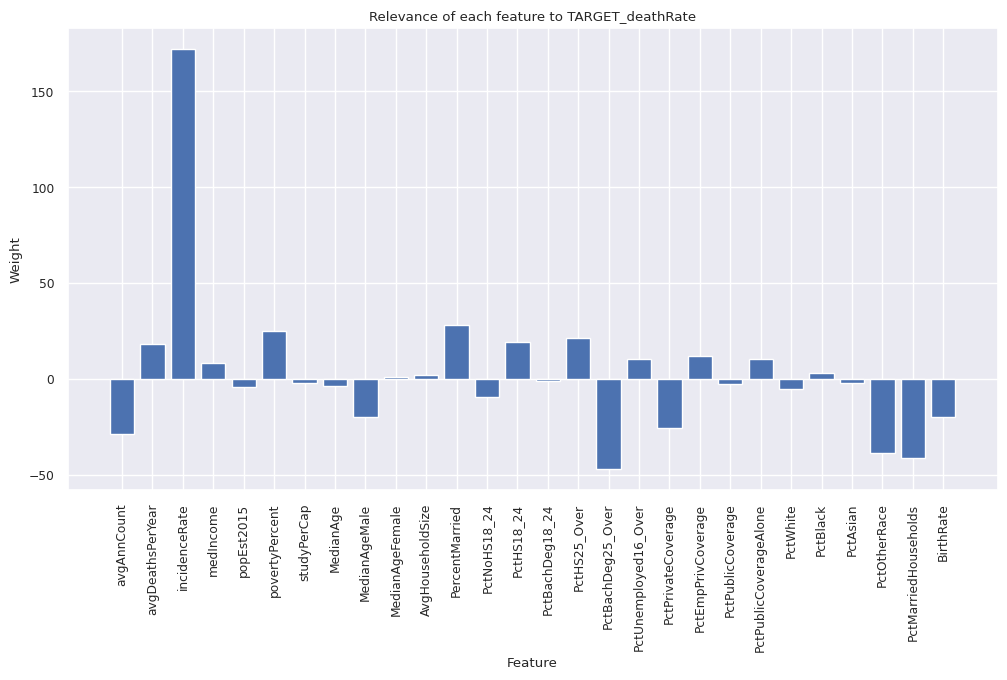

In [31]:
feature_names = df.columns[:-1]  # target 제외 (TARGET_deathRate)

# 그래프
plt.figure(figsize=(12, 6))
plt.bar(feature_names, weights)
plt.xlabel('Feature')
plt.ylabel('Weight')
plt.title('Relevance of each feature to TARGET_deathRate')
plt.xticks(rotation=90)
plt.show()

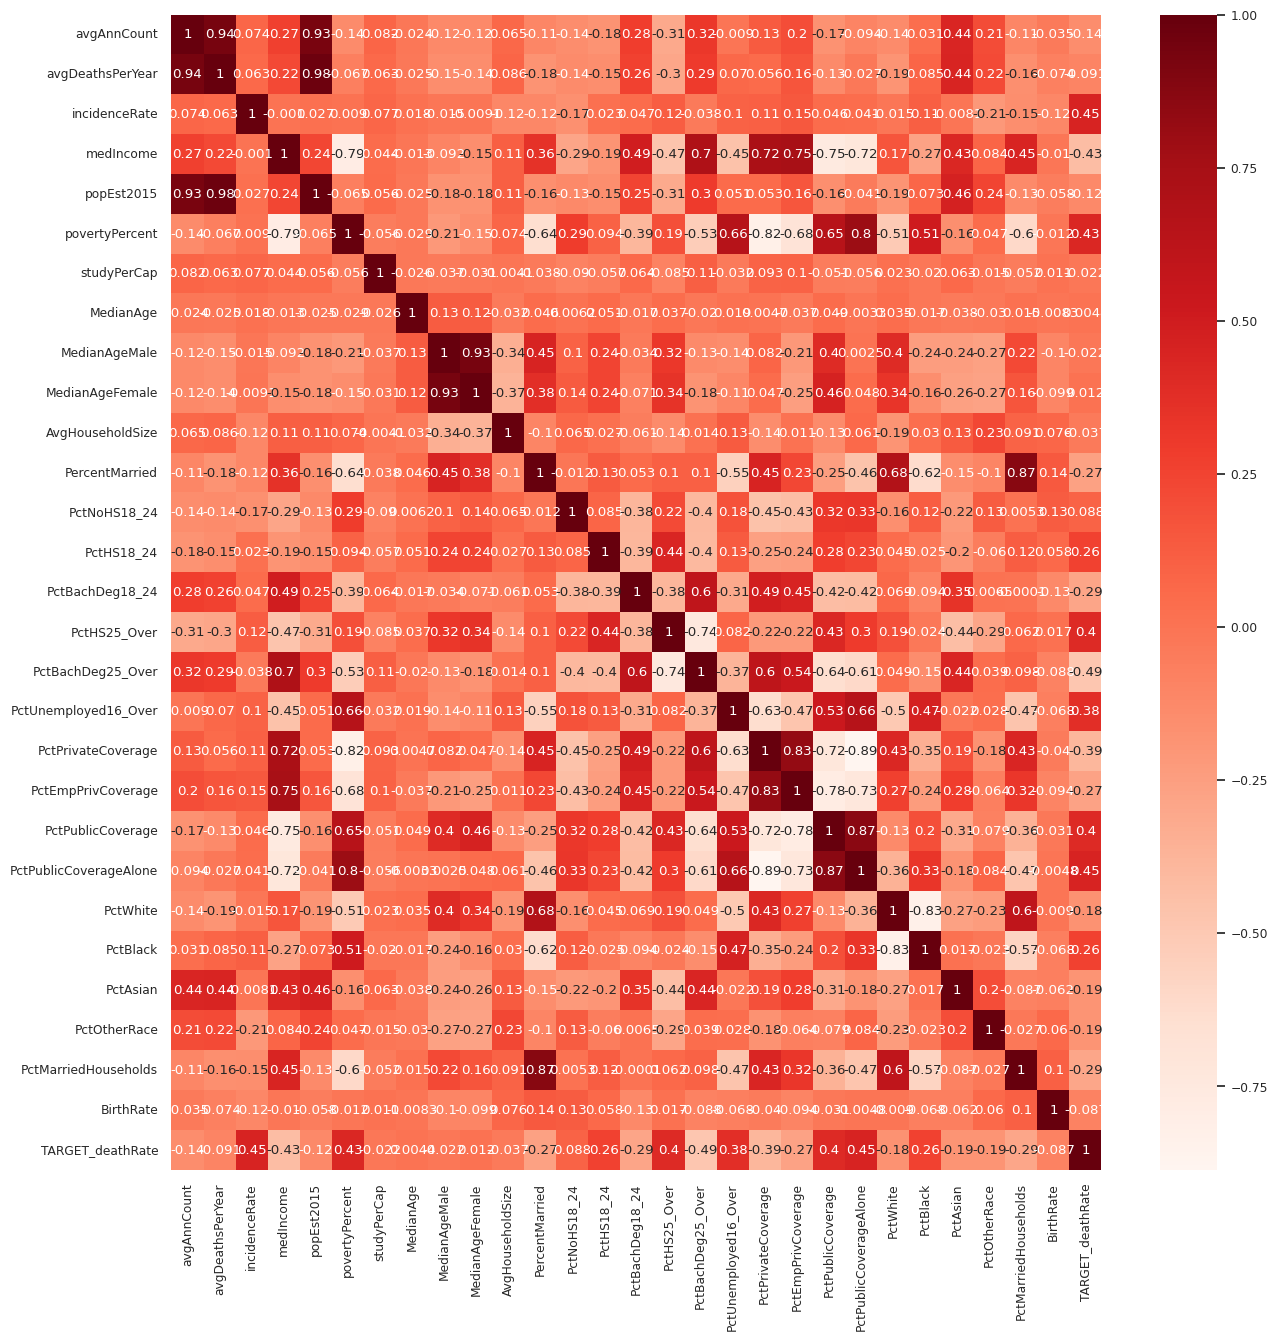

In [32]:
#상관 관계 분석
df_corr = df.corr()
df_corr
#히트맵
plt.figure(figsize=(15, 15)) #이미지 크기
sns.set(font_scale=0.8)     #폰트 스케일
sns.heatmap(df_corr, annot=True, cbar = True, cmap='Reds')  #annot 값 표시, cbar 오른쪽 바, cmap는 색깔
plt.show()

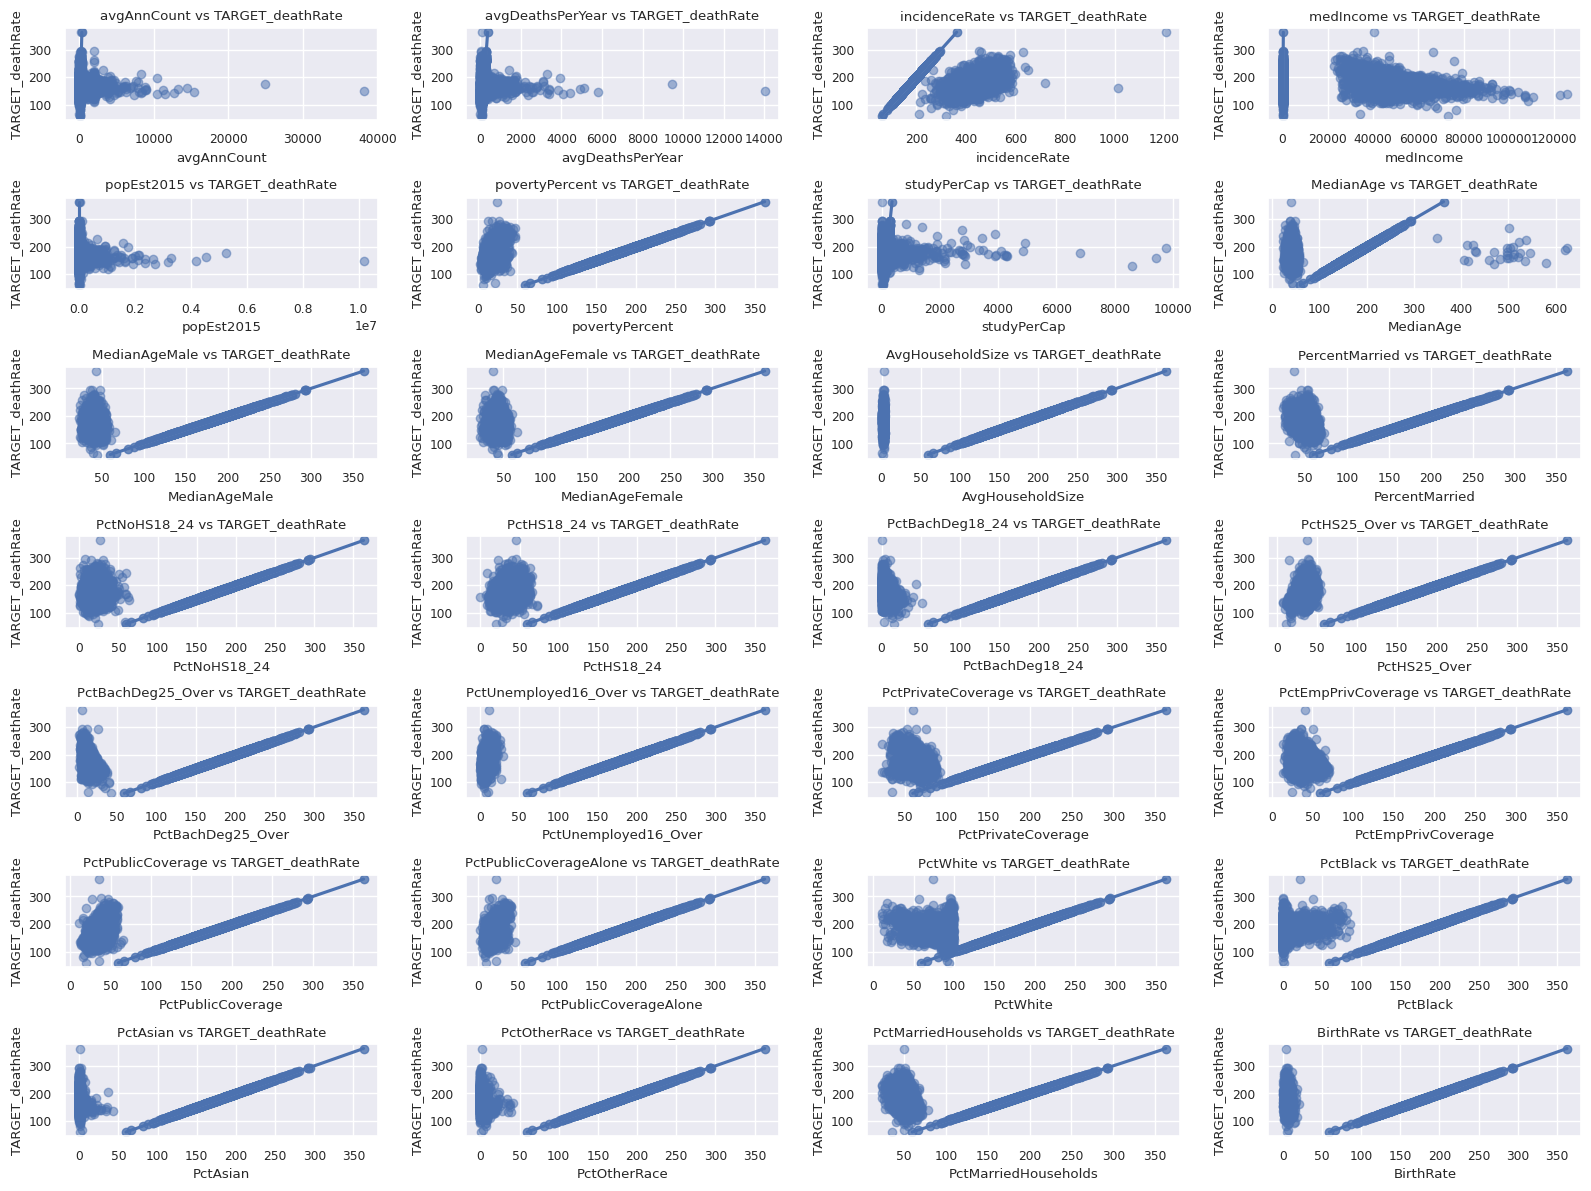

In [33]:
num_features = len(feature_names)
num_cols = 4
num_rows = int(np.ceil(num_features / num_cols))

fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 12))

for i, ax in enumerate(axes.flatten()):
    if i < num_features:
        feature = feature_names[i]
        sns.regplot(x=col, y=plot_cols[-1], data=plot_df, ax=ax)
        ax.scatter(X[feature], y, color='b', alpha=0.5)
        ax.set_xlabel(feature)
        ax.set_ylabel('TARGET_deathRate')
        ax.set_title(f'{feature} vs TARGET_deathRate')

plt.tight_layout()
plt.show()

In [37]:
for feature, weight in zip(feature_names, weights):
    print(f"{feature}: {weight}")

avgAnnCount: -28.50254431046574
avgDeathsPerYear: 18.297930737569498
incidenceRate: 171.97579691140646
medIncome: 8.578445670353355
popEst2015: -3.970009918008595
povertyPercent: 25.019006567969026
studyPerCap: -1.9938692612203484
MedianAge: -3.5466433938094295
MedianAgeMale: -19.884191301025254
MedianAgeFemale: 0.8736200366707717
AvgHouseholdSize: 2.3785141624075234
PercentMarried: 28.045002443850525
PctNoHS18_24: -9.143874918225878
PctHS18_24: 19.327917333186285
PctBachDeg18_24: -0.8714097342016534
PctHS25_Over: 21.647300897607803
PctBachDeg25_Over: -46.81363483241686
PctUnemployed16_Over: 10.276647470783992
PctPrivateCoverage: -25.266161440895484
PctEmpPrivCoverage: 12.016611209266168
PctPublicCoverage: -2.4736876965678007
PctPublicCoverageAlone: 10.391492266482226
PctWhite: -4.8884569084077665
PctBlack: 3.403821125307606
PctAsian: -2.012751251850466
PctOtherRace: -38.53940817877425
PctMarriedHouseholds: -40.94019699285428
BirthRate: -19.823254082836563


In [36]:
for feature, weight in zip(feature_names, weights):
    print(f"{feature}: {weight:.2f}")

avgAnnCount: -28.50
avgDeathsPerYear: 18.30
incidenceRate: 171.98
medIncome: 8.58
popEst2015: -3.97
povertyPercent: 25.02
studyPerCap: -1.99
MedianAge: -3.55
MedianAgeMale: -19.88
MedianAgeFemale: 0.87
AvgHouseholdSize: 2.38
PercentMarried: 28.05
PctNoHS18_24: -9.14
PctHS18_24: 19.33
PctBachDeg18_24: -0.87
PctHS25_Over: 21.65
PctBachDeg25_Over: -46.81
PctUnemployed16_Over: 10.28
PctPrivateCoverage: -25.27
PctEmpPrivCoverage: 12.02
PctPublicCoverage: -2.47
PctPublicCoverageAlone: 10.39
PctWhite: -4.89
PctBlack: 3.40
PctAsian: -2.01
PctOtherRace: -38.54
PctMarriedHouseholds: -40.94
BirthRate: -19.82
